# Applying Classification Modeling
The goal of this week's assessment is to find the model which best predicts whether or not a person will default on their bank loan. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 


#### Data Set Information:

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default. 

- NT is the abbreviation for New Taiwain. 


#### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - etc...
    - X11 = the repayment status in April, 2005. 
    - The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = amount of bill statement in September, 2005;
    - etc...
    - X13 = amount of bill statement in August, 2005; . . .; 
    - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005; . . .;
    - etc...
    - X23 = amount paid in April, 2005. 




You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) to predict credit card defaults and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

- You will be working in pairs for this assessment

### Please have ONE notebook and be prepared to explain how you worked in your pair.

1. Clean up your data set so that you can perform an EDA. 
    - This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Engineer new features. 
    - Create polynomial and/or interaction features. 
    - Additionaly, you must also create **at least 2 new features** that are not interactions or polynomial transformations. 
        - *For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.*
4. Perform some feature selection. 
    
5. You must fit **three** models to your data and tune **at least 1 hyperparameter** per model. 
6. Using the F-1 Score, evaluate how well your models perform and identify your best model.
7. Using information from your EDA process and your model(s) output provide insight as to which borrowers are more likely to deafult


In [1]:
# import libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


pd.options.display.max_columns=100


## 1. Data Cleaning

In [116]:
df = pd.read_csv('training_data.csv' , index_col=0)

In [117]:
df.Y.value_counts()

0                             17471
1                              5028
default payment next month        1
Name: Y, dtype: int64

In [118]:
# Split data to be used in the models
# Create matrix of features
X = df.drop('Y', axis = 1) # grabs everything else but 'Survived'


# Create target variable
y = df['Y'] # y is the column we're trying to predict

In [119]:
df['X3'].value_counts()

2            10516
1             7919
3             3713
5              208
4               90
6               42
0               11
EDUCATION        1
Name: X3, dtype: int64

In [120]:
# Reset index so that it's not equal to customer ID
df.reset_index(inplace=True)
# Rename columns
df.columns=list(df.iloc[18381])
# Remove row where ID = 'ID'
df=df[df.ID!="ID"]

df.reset_index(drop=True,inplace=True)
# Rename target variable as Y
df=df.rename(columns = {'default payment next month':'Y'})

df=df.astype(int)

## 2. EDA

In [121]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
0,28835,220000,2,1,2,36,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
1,25329,200000,2,3,2,29,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0
2,18894,180000,2,1,2,27,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,690,80000,1,2,2,32,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
4,6239,10000,1,2,2,27,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22494,16247,40000,2,2,1,38,0,0,3,2,2,2,35183,39197,39477,39924,39004,41462,4600,1200,1400,0,3069,0,1
22495,2693,350000,1,1,1,42,-1,-1,-1,-1,-1,-1,3800,3138,4150,3750,1362,8210,3138,4160,3750,2272,8210,9731,0
22496,8076,100000,2,3,2,46,1,-1,2,2,-1,0,0,203,203,0,7856,16544,203,0,0,7856,10000,865,0
22497,20213,20000,2,3,1,50,-1,-1,-1,-1,-2,-2,5141,3455,6906,0,0,0,3754,6906,290,0,0,0,1


In [122]:
# Check for missing values
df.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Y            0
dtype: int64

In [123]:
default = df.Y.value_counts()
default

0    17471
1     5028
Name: Y, dtype: int64

<BarContainer object of 2 artists>

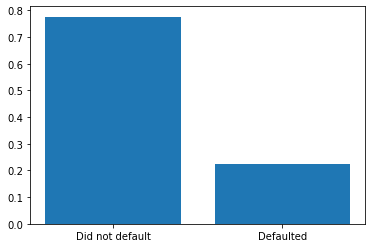

In [124]:
# Visualizing default rates
y = [default[0]/default.sum(), default[1]/default.sum()]
x = ['Did not default', 'Defaulted']

plt.bar(x,y)

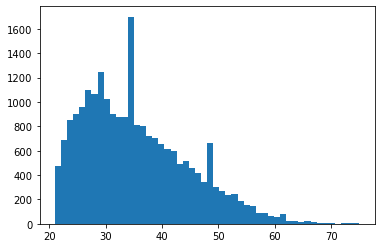

In [125]:
# Visualizing age distribution
plt.hist(df.AGE, bins=50)
plt.show()

In [126]:
# It seems that women tend to default at a slightly higher rate than men

In [127]:
df['MARRIAGE'].value_counts()

2    12026
1    10195
3      234
0       44
Name: MARRIAGE, dtype: int64

In [128]:
# Let's re-classify marriage status = 0 as other (3)
df.MARRIAGE = df.MARRIAGE.apply(lambda x: 3 if x==0 else x)

In [129]:
# Re-classifying all non-married persons as single
df.MARRIAGE = df.MARRIAGE.apply(lambda x: 2 if x==3 else x)

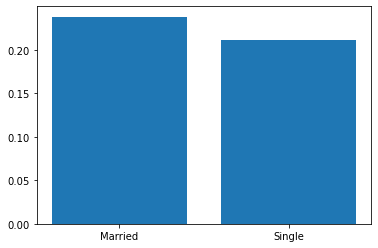

In [130]:
# Default rate by marriage status
x = np.sort(df['MARRIAGE'].unique())
y = [(df.groupby(['MARRIAGE']).Y.sum()[i]/len(df[df.MARRIAGE==i]['MARRIAGE'])) for i in x]

plt.bar(x, y)
plt.xticks(ticks = np.arange(1, 3, 1), labels=['Married', 'Single'])
plt.show()

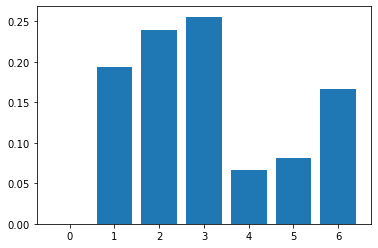

In [131]:
# Visualizing default rates by education level
x = df['EDUCATION'].unique()
y = [(df.groupby(['EDUCATION']).Y.sum()[i]/len(df[df.EDUCATION==i]['EDUCATION'])) for i in x]

plt.bar(x, y)
plt.xticks(ticks = np.arange(0, 7, 1))
plt.show()

In [132]:
# Default rates seem to be highest among individuals whose highest level of education is a high school diploma
# Exploring those with education==0
df[df.EDUCATION==0]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
4245,6877,360000,1,0,2,30,0,0,-1,0,0,-1,40250,23022,12272,34345,36777,30,23000,12280,25007,25008,1767,3300,0
5012,15108,210000,1,0,2,45,-2,-2,-2,-2,-2,-2,2563,5854,1032,788,3499,3372,5854,1032,788,3565,3372,15381,0
5702,3770,290000,2,0,2,38,1,-1,-1,-1,-1,-1,0,1437,3070,1406,2196,1481,1437,3078,1406,2196,1481,0,0
6675,17415,230000,2,0,2,47,-1,-1,-1,2,-1,-1,8394,5743,1336,255,5425,4838,5743,1598,0,5425,4838,3840,0
8450,20031,200000,2,0,2,30,-1,-1,2,-1,-1,-1,17160,7289,2868,9470,5816,7809,2880,0,9470,5834,7809,2886,0
8844,16897,200000,1,0,2,40,1,-2,-1,-1,-1,-2,0,0,200,1000,0,0,0,200,1000,0,0,0,0
13535,27156,160000,1,0,1,47,-1,-1,-1,-1,0,-1,386,907,3707,6987,3853,4613,907,3707,6991,77,4613,4099,0
13680,19921,50000,2,0,1,40,0,0,0,0,0,0,44749,46229,46798,47647,40500,41921,2229,2298,2100,2500,1921,8432,0
13838,5946,270000,1,0,2,39,1,-1,-1,-1,-1,-2,0,10193,69553,18607,0,0,10193,70213,19008,399,0,0,0
17256,16882,100000,1,0,2,37,0,0,-2,-2,-2,-2,7642,0,0,0,0,0,0,0,0,0,0,0,0


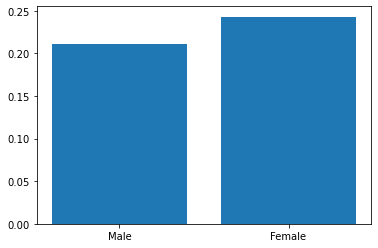

In [133]:
# Visualizing default rates by sex
x = df['SEX'].unique()
y = [(df.groupby(['SEX']).Y.sum()[1]/len(df[df.SEX==1]['SEX'])),
     (df.groupby(['SEX']).Y.sum()[2]/len(df[df.SEX==2]['SEX']))]

plt.bar(x, y)
plt.xticks(ticks = np.arange(1 ,3, 1), labels = ['Male', 'Female'])
plt.show()

In [134]:
total=[]
for i in range(len(df)):
    total.append(list(df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].loc[i].mode()))
total=[x[0]for x in total]
df['PAY_STAT_MODE']=total

In [135]:
total=[]
for i in range(len(df)):
    total.append(round(df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].loc[i].mean(),2))

df['BILL_AV']=total

In [136]:
total=[]
for i in range(len(df)):
    total.append(round(df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].loc[i].mean(),2))

df['PAY_AV']=total

In [137]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y,PAY_STAT_MODE,BILL_AV,PAY_AV
0,28835,220000,2,1,2,36,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1,0,208387.17,31485.17
1,25329,200000,2,3,2,29,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0,-1,326.00,326.00
2,18894,180000,2,1,2,27,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,-2,0.00,0.00
3,690,80000,1,2,2,32,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0,0,46583.67,1601.83
4,6239,10000,1,2,2,27,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1,0,5318.33,883.33


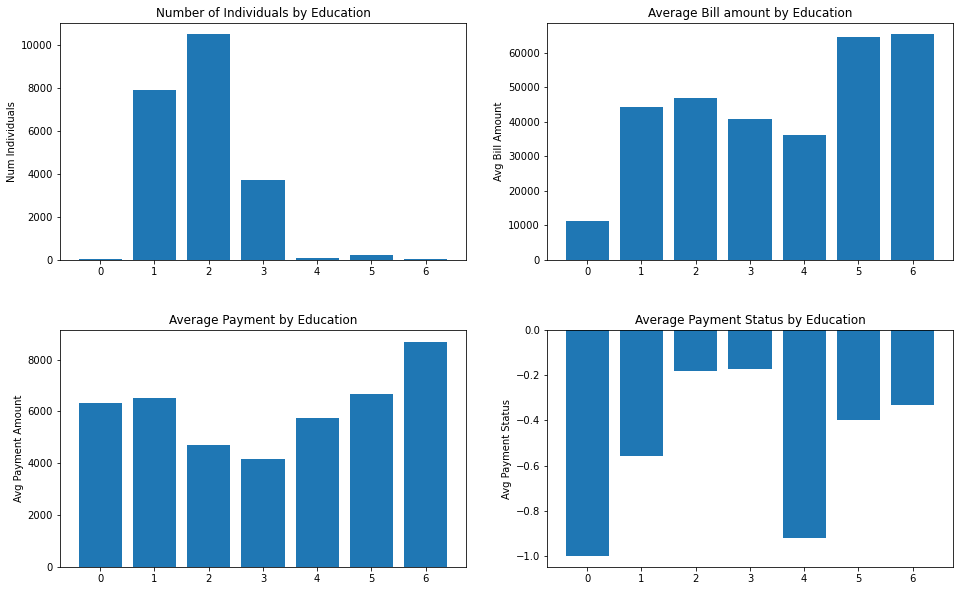

In [138]:
# Visualizing average bill amount, average payments, and median payment status by education

fig = plt.figure(figsize=(16,10))
fig.subplots_adjust(hspace = .30)

x = np.sort(df.EDUCATION.unique())
y1 = [df.EDUCATION.value_counts()[i] for i in x]

ax1 = fig.add_subplot(221)
ax1.bar(x, y1)
ax1.set_xticks(ticks = np.arange(0, 7, 1))
ax1.set_title('Number of Individuals by Education')
ax1.set_ylabel('Num Individuals')


y2 = [df.groupby(['EDUCATION']).BILL_AV.mean()[i] for i in x]

ax2 = fig.add_subplot(222)
ax2.bar(x, y2)
ax2.set_xticks(ticks = np.arange(0, 7, 1))
ax2.set_title('Average Bill amount by Education')
ax2.set_ylabel('Avg Bill Amount')

y3 = [df.groupby(['EDUCATION']).PAY_AV.mean()[i] for i in x]

ax3 = fig.add_subplot(223)
ax3.bar(x, y3)
ax3.set_xticks(ticks = np.arange(0, 7, 1))
ax3.set_title('Average Payment by Education')
ax3.set_ylabel('Avg Payment Amount')

y4 = [df.groupby(['EDUCATION']).PAY_STAT_MODE.mean()[i] for i in x]

ax4 = fig.add_subplot(224)
ax4.bar(x, y4)
ax4.set_xticks(ticks = np.arange(0, 7, 1))
ax4.set_title('Average Payment Status by Education')
ax4.set_ylabel('Avg Payment Status')

plt.show()


In [139]:
# Grouping 5,6, and 0 into unknown (5)
conditions = [
    df.EDUCATION==0,
    df.EDUCATION==6
]

choices = [
    5,
    5
]

df.EDUCATION = np.select(conditions, choices, default=df.EDUCATION)

 0    12554
-1     4657
-2     3358
 2     1789
 3       57
 7       44
 4       28
 1        8
 5        2
 8        1
 6        1
Name: PAY_STAT_MODE, dtype: int64


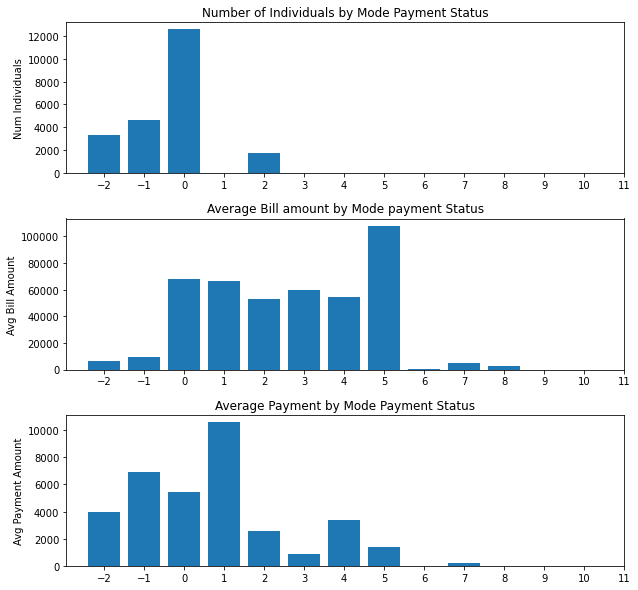

In [140]:
# Visualizing average bill amount, average payments, and median payment status by education

fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace = .30)

range_pay = np.arange(-2,12,1)
x = np.sort(df.PAY_STAT_MODE.unique())
y1 = [df.PAY_STAT_MODE.value_counts()[i] for i in x]

ax1 = fig.add_subplot(311)
ax1.bar(x, y1)
ax1.set_xticks(ticks = range_pay)
ax1.set_title('Number of Individuals by Mode Payment Status')
ax1.set_ylabel('Num Individuals')


y2 = [df.groupby(['PAY_STAT_MODE']).BILL_AV.mean()[i] for i in x]

ax2 = fig.add_subplot(312)
ax2.bar(x, y2)
ax2.set_xticks(ticks = range_pay)
ax2.set_title('Average Bill amount by Mode payment Status')
ax2.set_ylabel('Avg Bill Amount')

y3 = [df.groupby(['PAY_STAT_MODE']).PAY_AV.mean()[i] for i in x]

ax3 = fig.add_subplot(313)
ax3.bar(x, y3)
ax3.set_xticks(ticks = range_pay)
ax3.set_title('Average Payment by Mode Payment Status')
ax3.set_ylabel('Avg Payment Amount')

# y4 = [df.groupby(['PAY_STAT_MODE'])..mean()[i] for i in x]

# ax4 = fig.add_subplot(224)
# ax4.bar(x, y4)
# ax4.set_xticks(ticks = np.arange(0, 7, 1))
# ax4.set_title('Average Payment Status by Education')
# ax4.set_ylabel('Avg Payment Status')

print(df.PAY_STAT_MODE.value_counts())
plt.show()

In [141]:
# Binning Age
conditions = [
    (df.AGE>=20)&(df.AGE<30),
    (df.AGE>=30)&(df.AGE<40),
    (df.AGE>=40)&(df.AGE<50),
    (df.AGE>=50)&(df.AGE<60),
    (df.AGE>=60)&(df.AGE<70),
    (df.AGE>=70)&(df.AGE<80)
]

choices = [
    '20s',
    '30s',
    '40s',
    '50s',
    '60s',
    '70s'
]

df.AGE = np.select(conditions, choices)

30s    8414
20s    7287
40s    4761
50s    1769
60s     247
70s      21
Name: AGE, dtype: int64


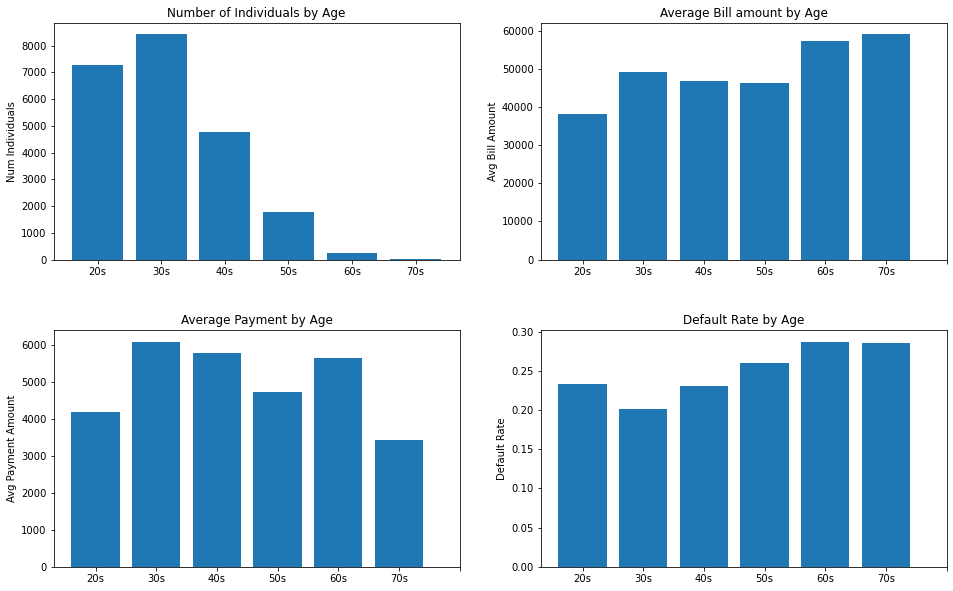

In [142]:
# Visualizing average bill amount, average payments, and median payment status by age

fig = plt.figure(figsize=(16,10))
fig.subplots_adjust(hspace = .30)

x = np.sort(df.AGE.unique())
y1 = [df.AGE.value_counts()[i] for i in x]

ax1 = fig.add_subplot(221)
ax1.bar(x, y1)
ax1.set_xticks(ticks = np.arange(0, 6, 1))
ax1.set_xticklabels(np.sort(df.AGE.unique()))
ax1.set_title('Number of Individuals by Age')
ax1.set_ylabel('Num Individuals')


y2 = [df.groupby(['AGE']).BILL_AV.mean()[i] for i in x]

ax2 = fig.add_subplot(222)
ax2.bar(x, y2)
ax2.set_xticks(ticks = np.arange(0, 7, 1))
ax2.set_title('Average Bill amount by Age')
ax2.set_ylabel('Avg Bill Amount')

y3 = [df.groupby(['AGE']).PAY_AV.mean()[i] for i in x]

ax3 = fig.add_subplot(223)
ax3.bar(x, y3)
ax3.set_xticks(ticks = np.arange(0, 7, 1))
ax3.set_title('Average Payment by Age')
ax3.set_ylabel('Avg Payment Amount')

y4 = [(df.groupby(['AGE']).Y.sum()[i]/len(df[df.AGE==i]['AGE'])) for i in x]

ax4 = fig.add_subplot(224)
ax4.bar(x, y4)
ax4.set_xticks(ticks = np.arange(0, 7, 1))
ax4.set_title('Default Rate by Age')
ax4.set_ylabel('Default Rate')

print(df.AGE.value_counts())

plt.show()

In [143]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y,PAY_STAT_MODE,BILL_AV,PAY_AV
0,28835,220000,2,1,2,30s,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1,0,208387.17,31485.17
1,25329,200000,2,3,2,20s,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0,-1,326.00,326.00
2,18894,180000,2,1,2,20s,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,-2,0.00,0.00
3,690,80000,1,2,2,30s,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0,0,46583.67,1601.83
4,6239,10000,1,2,2,20s,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1,0,5318.33,883.33


## 3. Feature Engineering

In [144]:
# Gen feature for num months that went over credit limit
df['MON_OV_BAL']=0
conditions=[
    df.BILL_AMT1>=df.LIMIT_BAL,
    df.BILL_AMT2>=df.LIMIT_BAL,
    df.BILL_AMT3>=df.LIMIT_BAL,
    df.BILL_AMT4>=df.LIMIT_BAL,
    df.BILL_AMT5>=df.LIMIT_BAL,
    df.BILL_AMT6>=df.LIMIT_BAL,
]
choices = [
    df['MON_OV_BAL']+1,
    df['MON_OV_BAL']+1,
    df['MON_OV_BAL']+1,
    df['MON_OV_BAL']+1,
    df['MON_OV_BAL']+1,
    df['MON_OV_BAL']+1,
      
]
df['MON_OV_BAL']=np.select(conditions,choices)

In [145]:
df.MON_OV_BAL

0        1
1        0
2        0
3        0
4        0
        ..
22494    1
22495    0
22496    0
22497    0
22498    0
Name: MON_OV_BAL, Length: 22499, dtype: int64

In [146]:
# Column summing Pay columns
df['SUM_PAY_STAT']=df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].sum(axis=1)
df['SUM_PAY_STAT']

0         0
1        -6
2       -12
3         0
4         0
         ..
22494     9
22495    -6
22496     3
22497    -8
22498    11
Name: SUM_PAY_STAT, Length: 22499, dtype: int64

In [147]:
# Feature for if bill amount increases
df['MON_BIL_INC']=0
conditions=[
    df.BILL_AMT2>=df.BILL_AMT1,
    df.BILL_AMT3>=df.BILL_AMT2,
    df.BILL_AMT4>=df.BILL_AMT3,
    df.BILL_AMT5>=df.BILL_AMT4,
    df.BILL_AMT6>=df.BILL_AMT5,
]
choices = [
    df['MON_BIL_INC']+1,
    df['MON_BIL_INC']+1,
    df['MON_BIL_INC']+1,
    df['MON_BIL_INC']+1,
    df['MON_BIL_INC']+1,
    
      
]
df['MON_BIL_INC']=np.select(conditions,choices,default=df['MON_BIL_INC']+0)

In [148]:
df.MON_BIL_INC

0        1
1        1
2        1
3        1
4        1
        ..
22494    1
22495    1
22496    1
22497    1
22498    1
Name: MON_BIL_INC, Length: 22499, dtype: int64

In [149]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y,PAY_STAT_MODE,BILL_AV,PAY_AV,MON_OV_BAL,SUM_PAY_STAT,MON_BIL_INC
0,28835,220000,2,1,2,30s,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1,0,208387.17,31485.17,1,0,1
1,25329,200000,2,3,2,20s,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0,-1,326.00,326.00,0,-6,1
2,18894,180000,2,1,2,20s,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,-2,0.00,0.00,0,-12,1
3,690,80000,1,2,2,30s,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0,0,46583.67,1601.83,0,0,1
4,6239,10000,1,2,2,20s,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1,0,5318.33,883.33,0,0,1


In [150]:
# Percentage of one's credit limit that is used
df['AVG_UTILIZATION'] = df.BILL_AV/df.LIMIT_BAL

In [151]:
# Average percentage of credit card bill paid
df['AVG_PERCENT_PAID'] = df.PAY_AV/df.BILL_AV

In [156]:
df.AVG_PERCENT_PAID.fillna(value=0, inplace=True)

In [157]:
df.AVG_PERCENT_PAID.replace(np.inf, value=0, inplace=True)

In [160]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y,PAY_STAT_MODE,BILL_AV,PAY_AV,MON_OV_BAL,SUM_PAY_STAT,MON_BIL_INC,AVG_UTILIZATION,AVG_PERCENT_PAID
0,28835,220000,2,1,2,30s,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1,0,208387.17,31485.17,1,0,1,0.947214,0.151090
1,25329,200000,2,3,2,20s,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0,-1,326.00,326.00,0,-6,1,0.001630,1.000000
2,18894,180000,2,1,2,20s,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,-2,0.00,0.00,0,-12,1,0.000000,0.000000
3,690,80000,1,2,2,30s,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0,0,46583.67,1601.83,0,0,1,0.582296,0.034386
4,6239,10000,1,2,2,20s,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1,0,5318.33,883.33,0,0,1,0.531833,0.166092


## 4. Feature Selection

In [183]:
# Drop columns that we've used to create features
df_model = df.drop(['ID'], axis=1)

# Create dummies for age
df_model = pd.concat([df_model, pd.get_dummies(df_model.AGE, drop_first=True)], axis=1)

In [184]:
df_model

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y,PAY_STAT_MODE,BILL_AV,PAY_AV,MON_OV_BAL,SUM_PAY_STAT,MON_BIL_INC,AVG_UTILIZATION,AVG_PERCENT_PAID,30s,40s,50s,60s,70s
0,220000,2,1,2,30s,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1,0,208387.17,31485.17,1,0,1,0.947214,0.151090,1,0,0,0,0
1,200000,2,3,2,20s,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0,-1,326.00,326.00,0,-6,1,0.001630,1.000000,0,0,0,0,0
2,180000,2,1,2,20s,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,-2,0.00,0.00,0,-12,1,0.000000,0.000000,0,0,0,0,0
3,80000,1,2,2,30s,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0,0,46583.67,1601.83,0,0,1,0.582296,0.034386,1,0,0,0,0
4,10000,1,2,2,20s,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1,0,5318.33,883.33,0,0,1,0.531833,0.166092,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22494,40000,2,2,1,30s,0,0,3,2,2,2,35183,39197,39477,39924,39004,41462,4600,1200,1400,0,3069,0,1,2,39041.17,1711.50,1,9,1,0.976029,0.043838,1,0,0,0,0
22495,350000,1,1,1,40s,-1,-1,-1,-1,-1,-1,3800,3138,4150,3750,1362,8210,3138,4160,3750,2272,8210,9731,0,-1,4068.33,5210.17,0,-6,1,0.011624,1.280666,0,1,0,0,0
22496,100000,2,3,2,40s,1,-1,2,2,-1,0,0,203,203,0,7856,16544,203,0,0,7856,10000,865,0,-1,4134.33,3154.00,0,3,1,0.041343,0.762881,0,1,0,0,0
22497,20000,2,3,1,50s,-1,-1,-1,-1,-2,-2,5141,3455,6906,0,0,0,3754,6906,290,0,0,0,1,-1,2583.67,1825.00,0,-8,1,0.129184,0.706360,0,0,1,0,0


In [185]:
df_model.drop(['AGE'], axis=1, inplace=True)

In [186]:
y = df_model.Y
X = df_model.drop(['Y'], axis=1)

In [187]:
X = X.astype(float)

### Creating Polynomial Features

In [191]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAY_STAT_MODE',
       'BILL_AV', 'PAY_AV', 'MON_OV_BAL', 'SUM_PAY_STAT', 'MON_BIL_INC',
       'AVG_UTILIZATION', 'AVG_PERCENT_PAID', '30s', '40s', '50s', '60s',
       '70s'],
      dtype='object')

In [189]:
from sklearn.preprocessing import PolynomialFeatures

poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(X)
poly2_columns = poly_2.get_feature_names(X.columns)
df_poly = pd.DataFrame(poly2_data, columns=poly2_columns)

In [190]:
df_poly.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_STAT_MODE,BILL_AV,PAY_AV,MON_OV_BAL,SUM_PAY_STAT,MON_BIL_INC,AVG_UTILIZATION,AVG_PERCENT_PAID,30s,40s,50s,60s,70s,LIMIT_BAL^2,LIMIT_BAL SEX,LIMIT_BAL EDUCATION,LIMIT_BAL MARRIAGE,LIMIT_BAL PAY_0,LIMIT_BAL PAY_2,LIMIT_BAL PAY_3,LIMIT_BAL PAY_4,LIMIT_BAL PAY_5,LIMIT_BAL PAY_6,LIMIT_BAL BILL_AMT1,LIMIT_BAL BILL_AMT2,LIMIT_BAL BILL_AMT3,LIMIT_BAL BILL_AMT4,LIMIT_BAL BILL_AMT5,...,MON_OV_BAL 30s,MON_OV_BAL 40s,MON_OV_BAL 50s,MON_OV_BAL 60s,MON_OV_BAL 70s,SUM_PAY_STAT^2,SUM_PAY_STAT MON_BIL_INC,SUM_PAY_STAT AVG_UTILIZATION,SUM_PAY_STAT AVG_PERCENT_PAID,SUM_PAY_STAT 30s,SUM_PAY_STAT 40s,SUM_PAY_STAT 50s,SUM_PAY_STAT 60s,SUM_PAY_STAT 70s,MON_BIL_INC^2,MON_BIL_INC AVG_UTILIZATION,MON_BIL_INC AVG_PERCENT_PAID,MON_BIL_INC 30s,MON_BIL_INC 40s,MON_BIL_INC 50s,MON_BIL_INC 60s,MON_BIL_INC 70s,AVG_UTILIZATION^2,AVG_UTILIZATION AVG_PERCENT_PAID,AVG_UTILIZATION 30s,AVG_UTILIZATION 40s,AVG_UTILIZATION 50s,AVG_UTILIZATION 60s,AVG_UTILIZATION 70s,AVG_PERCENT_PAID^2,AVG_PERCENT_PAID 30s,AVG_PERCENT_PAID 40s,AVG_PERCENT_PAID 50s,AVG_PERCENT_PAID 60s,AVG_PERCENT_PAID 70s,30s^2,30s 40s,30s 50s,30s 60s,30s 70s,40s^2,40s 50s,40s 60s,40s 70s,50s^2,50s 60s,50s 70s,60s^2,60s 70s,70s^2
0,220000.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,222598.0,222168.0,217900.0,221193.0,181859.0,184605.0,10000.0,8018.0,10121.0,6006.0,10987.0,143779.0,0.0,208387.17,31485.17,1.0,0.0,1.0,0.947214,0.151090,1.0,0.0,0.0,0.0,0.0,4.840000e+10,440000.0,220000.0,440000.0,0.0,0.0,0.0,0.0,0.0,0.0,4.897156e+10,4.887696e+10,4.793800e+10,4.866246e+10,4.000898e+10,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.947214,0.151090,1.0,0.0,0.0,0.0,0.0,0.897215,0.143114,0.947214,0.0,0.0,0.0,0.0,0.022828,0.151090,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,200000.0,2.0,3.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,-1.0,326.00,326.00,0.0,-6.0,1.0,0.001630,1.000000,0.0,0.0,0.0,0.0,0.0,4.000000e+10,400000.0,600000.0,400000.0,-200000.0,-200000.0,-200000.0,-200000.0,-200000.0,-200000.0,6.520000e+07,6.520000e+07,6.520000e+07,6.520000e+07,6.520000e+07,...,0.0,0.0,0.0,0.0,0.0,36.0,-6.0,-0.00978,-6.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,0.001630,1.000000,0.0,0.0,0.0,0.0,0.0,0.000003,0.001630,0.000000,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,180000.0,2.0,1.0,2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.00,0.00,0.0,-12.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3.240000e+10,360000.0,180000.0,360000.0,-360000.0,-360000.0,-360000.0,-360000.0,-360000.0,-360000.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,144.0,-12.0,-0.00000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,80000.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,51372.0,51872.0,47593.0,43882.0,42256.0,42527.0,1853.0,1700.0,1522.0,1548.0,1488.0,1500.0,0.0,46583.67,1601.83,0.0,0.0,1.0,0.582296,0.034386,1.0,0.0,0.0,0.0,0.0,6.400000e+09,80000.0,160000.0,160000.0,0.0,0.0,0.0,0.0,0.0,0.0,4.109760e+09,4.149760e+09,3.807440e+09,3.510560e+09,3.380480e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.582296,0.034386,1.0,0.0,0.0,0.0,0.0,0.339068,0.020023,0.582296,0.0,0.0,0.0,0.0,0.001182,0.034386,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10000.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,8257.0,7995.0,4878.0,5444.0,2639.0,2697.0,2000.0,1100.0,600.0,300.0,300.0,1000.0,0.0,5318.33,883.33,0.0,0.0,1.0,0.531833,0.166092,0.0,0.0,0.0,0.0,0.0,1.000000e+08,10000.0,20000.0,20000.0,0.0,0.0,0.0,0.0,0.0,0.0,8.257000e+0

In [300]:
# Creating list to store F1 scores
model_scores = []

## 5. Developing Baseline KNN Model
KNN, Logistic Regression, Decision Tree

In [289]:
# Starting off with KNN Modeling
# Conduct train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20200922)


In [290]:
# Normalize our data using min-max scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Instatiate the scaler
scaler = MinMaxScaler()  

# Fit the scaler to our training feature set
scaler.fit(X_train)

# Using the fitted scaler, transform the training feature set to values between 0 and 1
X_train = scaler.transform(X_train)  

# Transform the testing set as well to ensure consistency in predictions across feature sets
X_test = scaler.transform(X_test)  

In [291]:
# Import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

In [292]:
# Instantiate the estimator with number of neighbors equal to 5
knn = KNeighborsClassifier(n_neighbors=5)

In [293]:
# Fit the model to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [294]:
# Make class predictions for the training set
y_pred_train = knn.predict(X_train)

# Make class predictions for the testing set
y_pred_test = knn.predict(X_test)

In [265]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[3253  277]
 [ 674  296]]


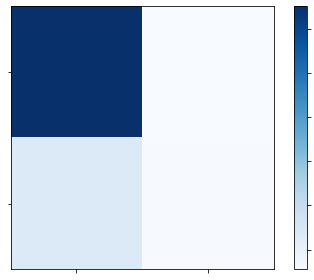

In [303]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_test)
classes = ['Defaulted', 'Did not default']

import itertools
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [305]:
# Evaluating F1 score of our baseline KNN model:
from sklearn import metrics

print('Training F1:', metrics.f1_score(y_train, y_pred_train)) 
print('Testing F1:', metrics.f1_score(y_test, y_pred_test))

model_scores.append({'model': 'knn_basic', 'training_f1': metrics.f1_score(y_train, y_pred_train),
                     'testing_f1': metrics.f1_score(y_test, y_pred_test)})

Training F1: 0.5485854858548586
Testing F1: 0.3836681788723266


## 6. Developing KNN GridSearchCV Model

In [307]:
# Import Grid search
from sklearn.model_selection import GridSearchCV

In [308]:
KNeighborsClassifier()

KNeighborsClassifier()

In [309]:
knn_params = {'n_neighbors': [1, 5, 10],
              'p': [1,2]}

In [313]:
# Creating the estimator
knn_gs = KNeighborsClassifier()

# Create the instance of GridSearchCV
grid_neighbors = GridSearchCV(knn_gs, knn_params, cv = 10, scoring='f1', verbose = 1, n_jobs=1)

# Fit the KNN Grid Search to our data
grid_neighbors.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   22.8s finished


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'n_neighbors': [1, 5, 10], 'p': [1, 2]}, scoring='f1',
             verbose=1)

In [314]:
# Best F1 score across all iterations of Knn
print('Best Score: %f' % (grid_neighbors.best_score_))
print('Best Params:', grid_neighbors.best_params_)


Best Score: 0.404446
Best Params: {'n_neighbors': 1, 'p': 2}


In [315]:
# Use the best model to made predictions for test set
y_pred_test = grid_neighbors.best_estimator_.predict(X_test)

In [316]:
print('Training F1:', grid_neighbors.best_score_) 
print('Testing F1:', metrics.f1_score(y_test, y_pred_test))

model_scores.append({'model': 'knn_basic_GS', 'training_f1': grid_neighbors.best_score_,
                     'testing_f1': metrics.f1_score(y_test, y_pred_test)})

Training F1: 0.4044462459185378
Testing F1: 0.3991915108640728


In [ ]:
# Slight improvement from baseline KNN model

## 7. Using Polynomial Feature Set for KNN

In [317]:
# Train Test Split with poly features

X_train, X_test, y_train, y_test = train_test_split(df_poly, y, test_size = 0.2, random_state=20200922)


In [318]:
# Scale the data using MinMax
# Instatiate the scaler
scaler = MinMaxScaler()  

# Fit the scaler to our training feature set
scaler.fit(X_train)

# Using the fitted scaler, transform the training feature set to values between 0 and 1
X_train = scaler.transform(X_train)  

# Transform the testing set as well to ensure consistency in predictions across feature sets
X_test = scaler.transform(X_test) 


In [319]:
# Instantiate the estimator with number of neighbors equal to 5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [320]:
# Make class predictions for the training set
y_pred_train = knn.predict(X_train)

# Make class predictions for the testing set
y_pred_test = knn.predict(X_test)

Confusion Matrix, without normalization
[[2879  651]
 [ 572  398]]


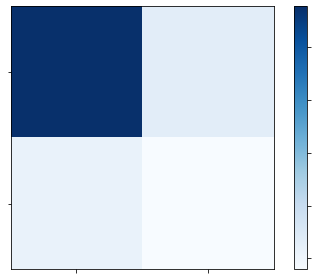

In [321]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
classes = ['Defaulted', 'Did not default']

import itertools
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [322]:
# Evaluating metrics for KNN polynomial

print('Training F1:', metrics.f1_score(y_train, y_pred_train)) 
print('Testing F1:', metrics.f1_score(y_test, y_pred_test))

model_scores.append({'model': 'knn_poly', 'training_f1': metrics.f1_score(y_train, y_pred_train),
                     'testing_f1': metrics.f1_score(y_test, y_pred_test)})

Training F1: 0.5438216165995664
Testing F1: 0.37711313394018203


In [ ]:
# Testing performed worse than more basic model

## 8. Using GridSearchCV for KKN model and Poly Feature Set

In [328]:
# Creating the estimator
knn_gs_poly = KNeighborsClassifier()

# Create the instance of GridSearchCV
grid_neighbors_poly = GridSearchCV(knn_gs_poly, knn_params, cv = 10, scoring='f1', verbose = 1, n_jobs=1)

# Fit the KNN Grid Search to our data
grid_neighbors_poly.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  8.8min finished


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'n_neighbors': [1, 5, 10], 'p': [1, 2]}, scoring='f1',
             verbose=1)

In [329]:
# Best F1 score across all iterations of Knn poly
print('Best Score: %f' % (grid_neighbors_poly.best_score_))
print('Best Params:', grid_neighbors_poly.best_params_)

Best Score: 0.405283
Best Params: {'n_neighbors': 1, 'p': 2}


In [331]:
# Use the best model to made predictions for test set
y_pred_test = grid_neighbors_poly.best_estimator_.predict(X_test)

In [332]:
print('Training F1:', grid_neighbors_poly.best_score_) 
print('Testing F1:', metrics.f1_score(y_test, y_pred_test))

model_scores.append({'model': 'knn_poly_GS', 'training_f1': grid_neighbors_poly.best_score_,
                     'testing_f1': metrics.f1_score(y_test, y_pred_test)})

Training F1: 0.4052831922417088
Testing F1: 0.3985837126960041


In [ ]:
# Performed slightly worse than GridSearch for knn with simpler model

## 9. Creating a Decision Tree Algorithm with basic feature set

In [333]:
# Re-split the data using our basic feature set again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20200922)


In [339]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Instantiate the decision tree classifier using all default parameters
clf = DecisionTreeClassifier(random_state=1)

In [340]:
# Fit the model to our training data
clf = clf.fit(X_train, y_train)

In [341]:
# Make predictions for y_values in the testing set
y_pred_train = clf.predict(X_train)

# Make predictions for y values in the unseen dataset
y_pred_test = clf.predict(X_test)

In [342]:
# Evaluate F1 score
print('Training F1:', metrics.f1_score(y_train, y_pred_train))
print('Testing F1:', metrics.f1_score(y_test, y_pred_test))

model_scores.append({'model': 'dt_basic', 'training_f1': metrics.f1_score(y_train, y_pred_train),
                     'testing_f1': metrics.f1_score(y_test, y_pred_test)})

Training F1: 0.9949276258814795
Testing F1: 0.39629087359687654


In [ ]:
# The model seems to have severely overfit to the training set

## 10. Creating Decision Tree GridSearchCV

In [343]:
dt_params = {'max_depth': range(1,21,1),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [2,5,10],
              'min_samples_split': [5,7,10]}

In [359]:
# Create the estimator
dtc = DecisionTreeClassifier(random_state=1)

# Create the instance
grid_dt_basic = GridSearchCV(dtc, dt_params, cv=10, scoring='f1', verbose=1, n_jobs=-12)

# Fit the decision tree classifier to the training data
grid_dt_basic.fit(X_train, y_train)

Fitting 10 folds for each of 360 candidates, totalling 3600 fits


[Parallel(n_jobs=-12)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-12)]: Done 3600 out of 3600 | elapsed: 11.8min finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
             n_jobs=-12,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 21),
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [5, 7, 10]},
             scoring='f1', verbose=1)

In [360]:
# Best F1 score across all iterations of Knn poly
print('Best Score: %f' % (grid_dt_basic.best_score_))
print('Best Params:', grid_dt_basic.best_params_)

Best Score: 0.490615
Best Params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [361]:
# Use the best model to made predictions for test set
y_pred_test = grid_dt_basic.best_estimator_.predict(X_test)

In [362]:
# Compare model performance on training and test sets
print('Training F1:', grid_dt_basic.best_score_) 
print('Testing F1:', metrics.f1_score(y_test, y_pred_test))

model_scores.append({'model': 'dt_basic_GS', 'training_f1': grid_dt_basic.best_score_,
                     'testing_f1': metrics.f1_score(y_test, y_pred_test)})

Training F1: 0.4906151490670053
Testing F1: 0.5062189054726368


## 11. Creating Decision Tree for Poly Feature Set

In [363]:
# Train Test Split with poly features

X_train, X_test, y_train, y_test = train_test_split(df_poly, y, test_size = 0.2, random_state=20200922)

In [364]:
# Instantiate the decision tree classifier using all default parameters
clf = DecisionTreeClassifier(random_state=1)

In [365]:
# Fit the model to our training data
clf = clf.fit(X_train, y_train)

In [366]:
# Make predictions for y_values in the testing set
y_pred_train = clf.predict(X_train)

# Make predictions for y values in the unseen dataset
y_pred_test = clf.predict(X_test)

In [367]:
# Evaluate F1 score
print('Training F1:', metrics.f1_score(y_train, y_pred_train))
print('Testing F1:', metrics.f1_score(y_test, y_pred_test))

model_scores.append({'model': 'dt_basic_poly', 'training_f1': metrics.f1_score(y_train, y_pred_train),
                     'testing_f1': metrics.f1_score(y_test, y_pred_test)})

Training F1: 0.9949276258814795
Testing F1: 0.39134615384615384


In [368]:
# The model seems to have severely overfit to the training set again

## 12. Creating Decision Tree for Poly Feature Set using GridSearchCV

In [370]:
# Create the estimator
dtc = DecisionTreeClassifier(random_state=1)

# Create the instance
grid_dt_poly = GridSearchCV(dtc, dt_params, cv=10, scoring='f1', verbose=1, n_jobs=-12)

# Fit the decision tree classifier to the training data
grid_dt_poly.fit(X_train, y_train)

Fitting 10 folds for each of 360 candidates, totalling 3600 fits


[Parallel(n_jobs=-12)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-12)]: Done 3600 out of 3600 | elapsed: 251.9min finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
             n_jobs=-12,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 21),
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [5, 7, 10]},
             scoring='f1', verbose=1)

In [371]:
# Best F1 score across all iterations of Knn poly
print('Best Score: %f' % (grid_dt_poly.best_score_))
print('Best Params:', grid_dt_poly.best_params_)

Best Score: 0.500212
Best Params: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [372]:
# Use the best model to made predictions for test set
y_pred_test = grid_dt_poly.best_estimator_.predict(X_test)

In [373]:
# Compare model performance on training and test sets
print('Training F1:', grid_dt_poly.best_score_) 
print('Testing F1:', metrics.f1_score(y_test, y_pred_test))

model_scores.append({'model': 'dt_poly_GS', 'training_f1': grid_dt_poly.best_score_,
                     'testing_f1': metrics.f1_score(y_test, y_pred_test)})

Training F1: 0.5002123791036011
Testing F1: 0.508532423208191


In [389]:
model_scores.pop(4)

{'model': 'dt_basic',
 'training_f1': 0.9949276258814795,
 'testing_f1': 0.3972933784436926}

In [390]:
model_perf = pd.DataFrame(model_scores)

In [391]:
model_perf

,model,training_f1,testing_f1
0,knn_basic,0.548585,0.383668
1,knn_basic_GS,0.404446,0.399192
2,knn_poly,0.543822,0.377113
3,knn_poly_GS,0.405283,0.398584
4,dt_basic,0.994928,0.396291
5,dt_basic_GS,0.490615,0.506219
6,dt_basic_poly,0.994928,0.391346
7,dt_poly_GS,0.500212,0.508532


In [ ]:
# Decision Tree Polynomial Model with GridSearch CV outperformed all other models.

In [392]:
# Pickle Best Model
import pickle

pickle_out = open('dt_poly_GS.pickle', 'wb')
pickle.dump(grid_dt_poly, pickle_out)
pickle_out.close()

pickle_out = open('model_perf_df.pickle', 'wb')
pickle.dump(model_perf, pickle_out)
pickle_out.close()